### Constructing Adaboost algorithm

##### Boosting for binary classification (General Approach):

$X^l = (x_i, y_i)_{i=1}^l$ - training sample

$a(x)=C(b(x))$ - algorithm, where

$b: X \rightarrow R$ - weak learner, R is an estimate, which is a real value, e.g. probability of belonging to certain class

$C: R \rightarrow Y$ - desicion rule, that converts estimate to discrete class label, e.g. $C(b(x)) = sign(b(x))$

boosting is a composition of $b_1 ... b_T$ weak learners s.t.

$a(x) = C(F(b_1(x) ... b_T(x))$, where

$F: R^T \rightarrow R$ - converts vector of estimates into one estimate.

$\\[1pt]$

Examples of F:

1. Simple voting:

$F(b_1(x) ... b_T(x) = \frac{1}{T} \sum_{t=1}^T b_t(x), \space x \in X$

1. Weighted voting:

$F(b_1(x) ... b_T(x) = \frac{1}{T} \sum_{t=1}^T \alpha_t b_t(x), \space x \in X, \space \alpha \in R$

For construction of AdaBoost classifier we will use weighted voting.

$\\[]$
***
$\\[]$

##### AdaBoost Algorithm:

$Y = \{+1, -1\}, \space b_t \rightarrow \{+1, -1\}, \space C(b) = sign(b(x))$

$a(x) = sign(\sum_{t=1}^T \alpha_t b_t(x))$

for b_t we will use decision stump which is the one-level decision tree.

At this step our loss fuction is a treshhold function that count number of misclassified samples:

$$Q_t = \sum_{i=1}^l \underbrace{\big[y_i \sum_{i=1}^T \alpha_t b_t(x_i) < 0 \big]}_\text{$M_i$}$$


We can't effectively optimize treshold function, so we must introduce two heurisitcs:
 1. First of all, we will use smooth function to majoritaze threshold loss, in case of AdaBoost this smooth function is exponential: $[M < 0] \leq e^{-M}$ 
 
 2. Secondly, we will turn one optimization problem into T sequential ones, thus $\alpha_1b_1(x)...\alpha_{t-1}b_{t-1}(x)$ are fixed when we add $\alpha_tb_t(x)$.
 
$\\[2pt]$

Plugging exponent into $Q_t$:

$$ Q_T \leq \tilde Q_T = \sum_{i=1}^l \underbrace{exp\big(-y_i\sum_{t=1}^{T-1}\alpha_tb_t(x_i)\big)}_{w_i}exp(-y_i\alpha_Tb_T(x_i))$$

Let's interpret $w_i$:

If $w_i$ is big is big then accumulated in $T$-1 iterations $M_i$ negative and large in absolute terms, which means $i$'th object is difficult for classification. Thus when we run new alogrithm $b_T$ we prioritize those object that were difficult for classification on $T$-1 steps. That's where the name of algorithm comes from, adaptive means that on each iteration new algorithm takes into account what objects were missclassified.

If we missclassify the object too often its weight become very large and otherwise if we always classify the object correctly weight become very small, this disproportion can cause numerical instability and it is recommended to normalize weights on each iteration:

$\tilde w_i = w_i / \sum_{j=1}^N w_j$

$\tilde W^l = (\tilde w_1 ... \tilde w_l)$

Next, we need to introduce two metrics:

$P(b; \tilde W^l)$ and $N(b; \tilde W^l)$ which are the weighted number of correctly and incorrectly classified samples.

$\\[2pt]$

At 1995, creators of AdaBoost algorithm Freund and Shapire presented the following theorem in their work:

Let for any $\tilde W^l$ there is a $b \in B$ s.t. $N(b; \tilde W^l) < \frac{1}{2}$, i.e. $b$ is atleast slightly better then random guessing, then $\tilde Q_T$ is minimzed when:

$$b_T = \arg\min_{b \in B} N(b; \tilde W^l)$$

$$\alpha_T = \frac{1}{2} ln\big(\frac{1-N(b; \tilde W^l)}{N(b; \tilde W^l)}\big)$$

where $\alpha_T$ is found from the equation $\frac{\partial \tilde Q_t}{\partial \alpha_t} = 0$

$\\[2pt]$

Now we can write the whole AdaBoost algorithm:

In: $X^l$, parameter $T$

Out: $\alpha_tb_t$, $t=1,...,T$

$1$. Initialize weights:
    $w_i := \frac{1}{l}$, $i=1,...,l$

2. for each t,...,T:
    
    $3$. $b_t := \arg\min_{b} N(b; \tilde W^l)$
    
    $3$. $\alpha_t := \frac{1}{2} ln\big(\frac{1-N(b; \tilde W^l)}{N(b; \tilde W^l)}\big)$  

    $4$. $w_i := w_i exp(-y_i \alpha_t, b_t(x_i))$, $i=1,...,l$

    $6$. Normalize weights: $\tilde w_i = w_i / \sum_{j=1}^N w_j$, $i=1,...,l$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree

In [2]:
ds = pd.read_csv('toy_ds.csv')
X = np.array(ds.iloc[:,:2])
y = np.array(ds.iloc[:,2])

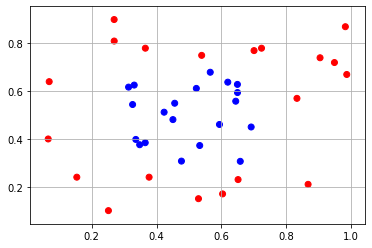

In [3]:
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(X[:,0], X[:,1], c=y.tolist(), cmap=cm_bright)
plt.grid()
plt.show()

[Text(167.4, 163.07999999999998, 'X[1] <= 0.639\nentropy = 0.5\nsamples = 40\nvalue = [20, 20]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.436\nsamples = 28\nvalue = [9, 19]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.153\nsamples = 12\nvalue = [11, 1]')]

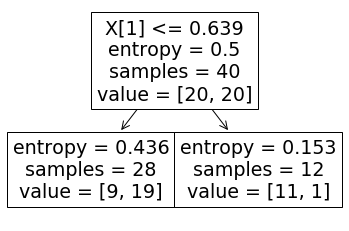

In [4]:
# Example of decision stump that we are going to use as weak learner

clf = DTC(max_depth=1, max_leaf_nodes=2)
clf.fit(X, y)
tree.plot_tree(clf)

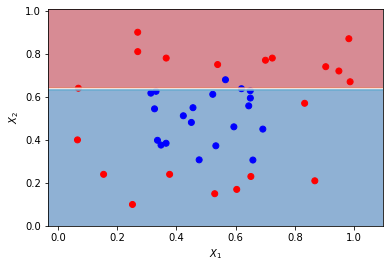

In [5]:
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .11
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .11
xx, yy = np.meshgrid( np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100) )

Xfull = np.c_[xx.ravel(), yy.ravel()]
zz = np.array( [clf.predict_proba(Xfull)[:,1]] )
Z = zz.reshape(xx.shape)

plt.contourf(xx, yy, Z, 4, cmap='RdBu', alpha=.5)
plt.contour(xx, yy, Z, 2, cmap='RdBu')
plt.scatter(X[:,0],X[:,1], c=y, cmap = cm_bright)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

Function that runs AdaBoost algo on given sample:

In [6]:
def adaboost(X, y, T):
    '''
    error = estimator error
    alpha = estimator weight
    weights = sample weights
    '''
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [],[],[],[],[]
    weights = np.ones(len(y))/len(y)
    sample_weight_list.append(weights.copy())
    #print(weights)
    
    for t in range(T):
        
        clf = DTC(max_depth=1, max_leaf_nodes=2)
        clf.fit(X, y, sample_weight=weights)
        y_predict = clf.predict(X)

        incorrect = (y_predict!=y)
        error = (np.average(incorrect, weights=weights))/sum(weights)
        alpha = (1/2)*np.log((1-error) / error)
        weights *= (np.e**(-(alpha*y*y_predict)))/sum(weights)
        #print('iter:',t, weights)
        
        estimator_list.append(clf)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(error.copy())
        estimator_weight_list.append(alpha.copy())
        sample_weight_list.append(weights.copy())
        #print(sample_weight_list)
        
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)
    
    preds = np.array([np.sign((y_predict_list[:,i] * estimator_weight_list).sum()) for i in range(len(y))])
    #print('Accuracy:', (preds==y).sum()/len(y))
   
    return estimator_list, estimator_weight_list, sample_weight_list

In [7]:
estimator_list, estimator_weight_list, sample_weight_list = adaboost(X, y, 100)

Function that plots decison boundary on every iteration:

In [8]:
def decision_boundary(adaboost, X, y):
    '''
    function plots decision boundary 
    for every iteration of adaboost algo 
    '''
    
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100) )
    Xfull = np.c_[xx.ravel(), yy.ravel()]
    
    estimator_list, estimator_weight_list, sample_weight_list = adaboost(X, y, 10)
    
    fig = plt.figure(figsize = (14,14))
    
    for est, sample_weights, m in zip(estimator_list, sample_weight_list, range(0, 10)):
        
        zz = np.array( [est.predict_proba(Xfull)[:,1]] )
        Z = zz.reshape(xx.shape)
        
        fig.add_subplot(4,3,m+1)
        plt.subplots_adjust(hspace = 0.3)
        ax = plt.gca()
        ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
        ax.contour(xx, yy, Z,  2, cmap='RdBu')
        ax.scatter(X[:,0],X[:,1], c = y, s=sample_weights*1000, cmap = cm_bright)
        ax.title.set_text('Weak Learner '+str(m+1))
        ax.set_xlabel('$X_1$')
        ax.set_ylabel('$X_2$')

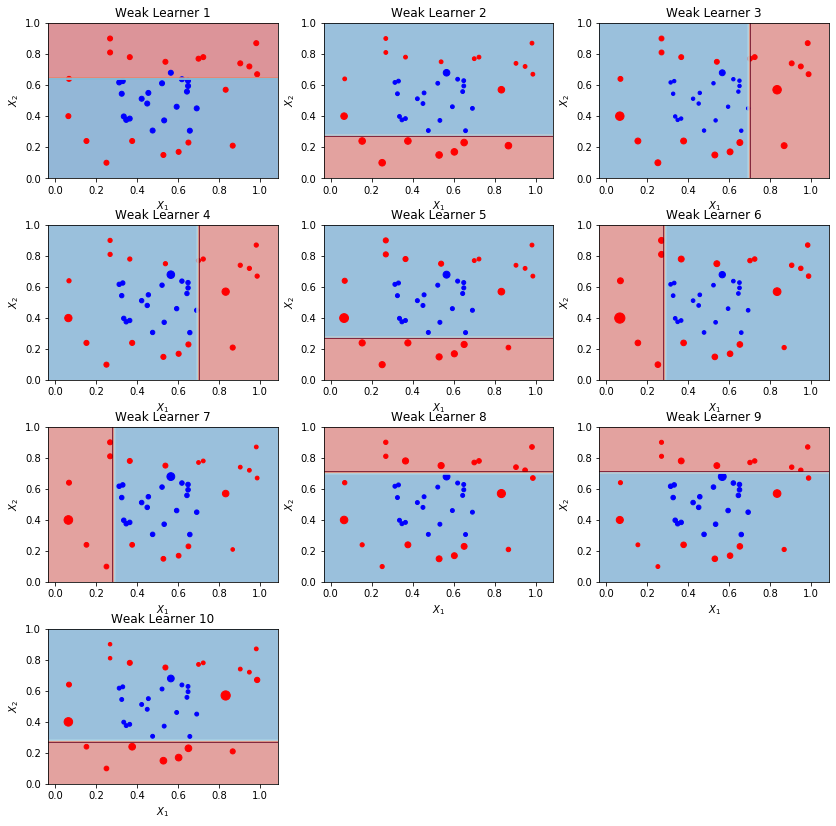

In [9]:
# Let's see what happens on each iteration

decision_boundary(adaboost, X, y)

Function that plots final decision boundary:

In [10]:
def final_boundary(estimators, estimator_weights, X, y):
    '''
    This function plots final decision boundary,
    i.e. boundary produced by the ensemble of
    weak learners
    '''
    
    def adaboost_classify_point(X, estimators, estimator_weights):
        '''
        Return classification prediction for a 
        given point X and a previously fitted adaboost
        '''
        weak_preds = np.asarray( [ a*e.predict(X) for a, e in zip(estimator_weights, estimators) ]  
                                / estimator_weights.sum() )
        preds = np.sign(weak_preds.sum(axis=0))
        return preds
        
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100) )
    Xfull = np.c_[xx.ravel(), yy.ravel()]
    
    zz = np.array( adaboost_classify_point(Xfull, estimator_list, estimator_weight_list) )
    Z = zz.reshape(xx.shape)
    
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.gca()
    ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
    ax.contour(xx, yy, Z,  2, cmap='RdBu')
    ax.scatter(X[:,0],X[:,1], c=y, cmap = cm_bright)
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')

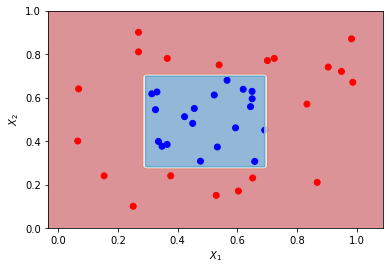

In [11]:
final_boundary(estimator_list, estimator_weight_list, X, y)